In [6]:
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_analysis as helper

In [8]:
us_data = helper.csv_to_dataframe('data/2020-elections-data.csv')
leading_digits_us = helper.find_all_leading_digits(us_data['votes'], 1)
russia_data = helper.csv_to_dataframe('data/2018-Russia-election-data.csv')
leading_digits_russia = helper.find_all_leading_digits(russia_data['votes'], 1)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


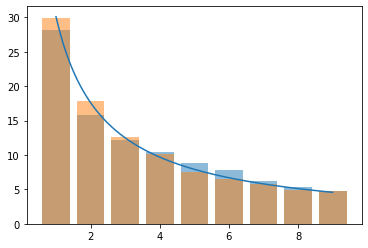

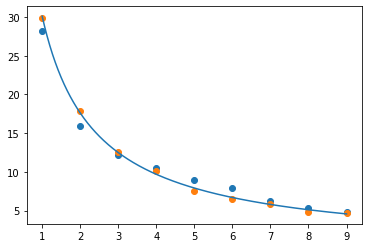

In [9]:
us_percentages = helper.data_to_percentage(leading_digits_us)
russia_percentages = helper.data_to_percentage(leading_digits_russia)
print(us_percentages.index)

theoretical_x_values = np.linspace(1, 9, 1000)
theoretical_y_values = np.log10(1 + 1 / theoretical_x_values) * 100

plt.bar(russia_percentages.index, russia_percentages, alpha=0.5)
plt.bar(us_percentages.index, us_percentages, alpha=0.5)

plt.plot(theoretical_x_values, theoretical_y_values)

plt.figure()

plt.scatter(russia_percentages.index, russia_percentages)
plt.scatter(us_percentages.index, us_percentages)

plt.plot(theoretical_x_values, theoretical_y_values)


In [10]:
print(helper.per_candidate_votes(us_data))

   Donald J. Trump  Joseph R. Biden Jr.  Dr. Jo Jorgensen  Write-in  \
0             3107                  360                46         9   

   James Janos  Donald L. Blankenship  Brock Pierce  Rocky de la Fuente  \
0            1                     31            20                 110   

   Gloria La Riva  Phil Collins  ...  Eric Boddie  Jerry Segal  Jade Simmons  \
0               1            10  ...            1          147            10   

   None of These Candidates  Sheila 'Samm' Tittle  Dario Hunter  \
0                       355                    20           119   

   Alyson Kennedy  Joe McHugh  H. Brooke Paige  Christopher LaFontaine  
0               2          81               72                      45  

[1 rows x 26 columns]


In [11]:
print(helper.get_votes_by_region(us_data))

ValueError: arrays must all be same length

Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY'],
      dtype='object')
AL


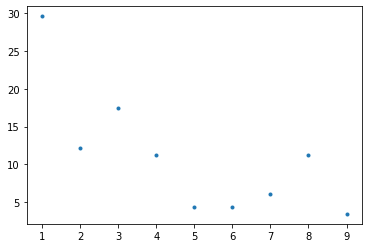

AK
AZ
AR
CA
CO
CT
DE
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY


In [7]:
us_states_data = helper.get_votes_by_region(us_data)
#us_states_leadings_digits = helper.find_all_leading_digits(us_states_data,1,)
print(us_states_data.columns)
#states_percentages = [helper.data_to_percentage(us_states_leadings_digits, state_names)]
fig,axis = plt.subplots(nrows = 1, ncols = 1)
for state in us_states_data.columns: 
    state_leading_digits = helper.find_all_leading_digits(us_states_data[state],1)
    state_percentages = helper.data_to_percentage(state_leading_digits)
    axis.plot(state_percentages.index, state_percentages,'.')
    print(state)
    plt.show()